In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/Colab \Notebooks/microscopy_self_supervised_learning/

/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning


imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import os

Paths & Metadata

In [15]:
BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/microscopy_self_supervised_learning/data/raw"
RESULTS_DIR = "results/figures"
os.makedirs(RESULTS_DIR, exist_ok=True)

metadata = pd.read_csv("data/processed/metadata_with_moa.csv")
subset = metadata.sample(n=min(2000, len(metadata)), random_state=42)

In [ ]:
labels_moa = metadata["moa"].values
labels_compound = metadata["compound"].values

Load embeddings

In [16]:
embeddings = np.load("data/processed/ssl_embeddings.npy")

Encode labels

In [17]:
le_moa = LabelEncoder()
moa_enc = le_moa.fit_transform(labels_moa)

le_comp = LabelEncoder()
comp_enc = le_comp.fit_transform(labels_compound)

PCA by MOA

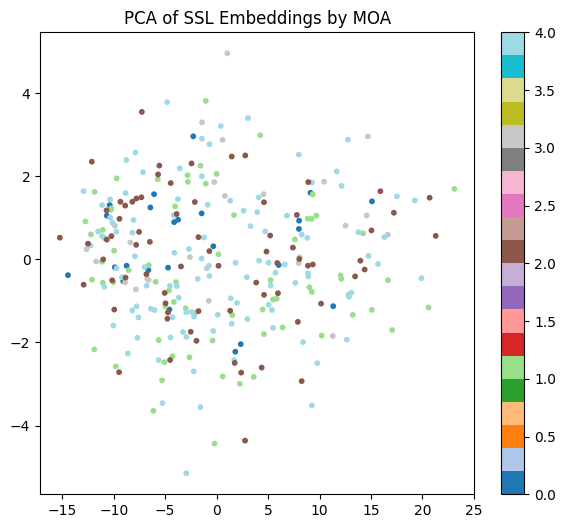

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=moa_enc, cmap="tab20", s=10)
plt.colorbar(scatter)
plt.title("PCA of SSL Embeddings by MOA")
plt.savefig(f"{RESULTS_DIR}/pca_ssl_by_moa.png")
plt.show()

UMAP by MOA

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


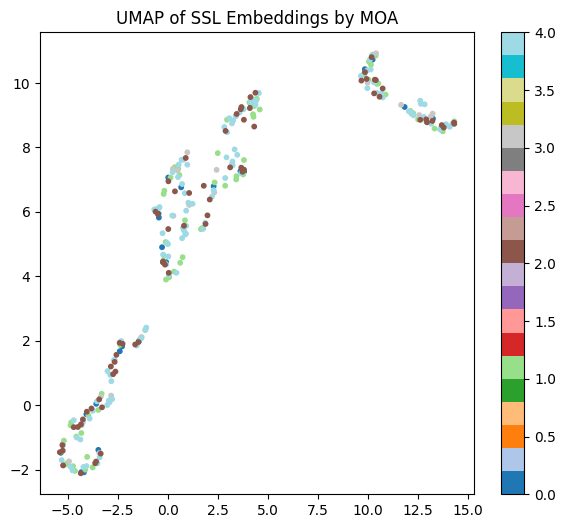

In [19]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(embeddings)

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=moa_enc, cmap="tab20", s=10)
plt.colorbar(scatter)
plt.title("UMAP of SSL Embeddings by MOA")
plt.savefig(f"{RESULTS_DIR}/umap_ssl_by_moa.png")
plt.show()

UMAP by compound

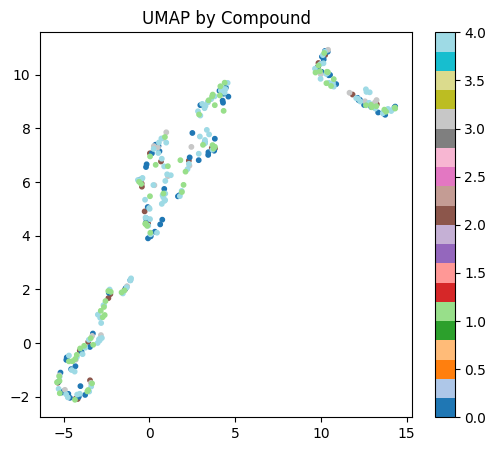

In [20]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=comp_enc, cmap="tab20", s=10)
plt.colorbar(scatter)
plt.title("UMAP by Compound")
plt.savefig(f"{RESULTS_DIR}/umap_by_compound.png")
plt.show()

In [21]:
umap_df = pd.DataFrame({
    "umap1": X_umap[:,0],
    "umap2": X_umap[:,1],
    "moa": labels_moa,
    "compound": labels_compound
})

umap_df.to_csv("results/tables/umap_coordinates.csv", index=False)
print("Saved UMAP coordinates")

Saved UMAP coordinates


Example reconstructed cells : redo 5th autoencoer and generate example_

In [ ]:
examples = np.load("../data/processed/example_images.npy")

fig, axes = plt.subplots(2,5, figsize=(10,4))
for i in range(5):
    axes[0,i].imshow(examples[i][0], cmap="gray")
    axes[1,i].imshow(examples[i][1], cmap="gray")
    axes[0,i].set_title("Original")
    axes[1,i].set_title("Reconstructed")
    axes[0,i].axis("off")
    axes[1,i].axis("off")

plt.savefig(f"{RESULTS_DIR}/example_cells.png")
plt.show()